# Spiral Dataset: Custom vs PyTorch Neural Network

This notebook trains identical models on the spiral dataset from https://cs231n.github.io/neural-networks-case-study/

First, I train a homemade neural network using the cnn module I built. Then train a neural network of identical strcuture using PyTorch as a comparison.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
sns.set_theme()

In [2]:
from cnn import Sequential 
from cnn.layers import Linear, ReLU, Softmax, Conv2d, MaxPool2d, Dropout, Flatten
from cnn.loss import CrossEntropyLoss
from cnn.optim import Adam
from cnn.utils import generate_spiral_data, plot_spiral_data_decision_boundary, train_val_test_split, train_val, plot_training_metrics, test

### 1. Load and Visualize Data

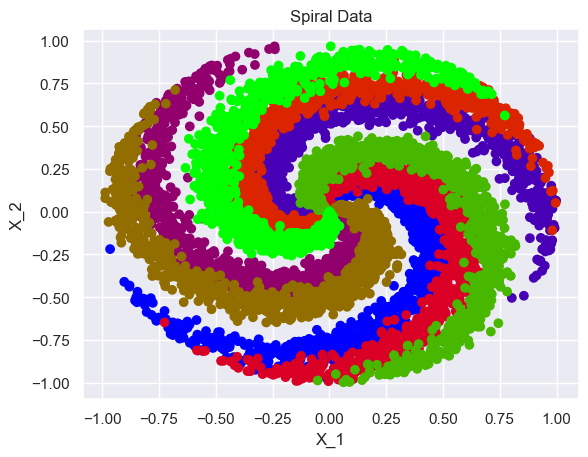

In [3]:
N = 1000 # number of points per class
D = 2 # dimensionality
K = 8 # number of classes
X, y = generate_spiral_data(N, D, K)
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y)

### 2. Build, Train, and Test Homemade Model

In [4]:
EPOCHS = 100
lr = 1e-3
batch_size = 32

ordered_layers = [
      Linear(D, 32),
      ReLU(),      
      Linear(32, 16),
      ReLU(),
      Linear(16, K),
      Softmax()
    ]

loss = CrossEntropyLoss()
optim = Adam(lr=lr)
model = Sequential(
  layers=ordered_layers,
  loss_func = loss,
  optimizer = optim
)

train_losses, train_accuracies, val_losses, val_accuracies = train_val(model, X_train, y_train, X_val, y_val, epochs=EPOCHS, batch_size=batch_size, verbose_freq = 10)

Epoch 10, Train Loss: 0.700060, Train Accuracy: 0.764464, Val Loss: 0.697701, Val Accuracy: 0.772500
Epoch 20, Train Loss: 0.489851, Train Accuracy: 0.822321, Val Loss: 0.508451, Val Accuracy: 0.805000
Epoch 30, Train Loss: 0.417712, Train Accuracy: 0.846786, Val Loss: 0.452588, Val Accuracy: 0.815000
Epoch 40, Train Loss: 0.383692, Train Accuracy: 0.855536, Val Loss: 0.406648, Val Accuracy: 0.833333
Epoch 50, Train Loss: 0.361809, Train Accuracy: 0.865357, Val Loss: 0.388360, Val Accuracy: 0.845000
Epoch 60, Train Loss: 0.344204, Train Accuracy: 0.868571, Val Loss: 0.380853, Val Accuracy: 0.852500
Epoch 70, Train Loss: 0.333900, Train Accuracy: 0.867679, Val Loss: 0.374053, Val Accuracy: 0.853333
Epoch 80, Train Loss: 0.328639, Train Accuracy: 0.867679, Val Loss: 0.361670, Val Accuracy: 0.866667
Epoch 90, Train Loss: 0.322756, Train Accuracy: 0.877500, Val Loss: 0.345780, Val Accuracy: 0.865000
Epoch 100, Train Loss: 0.318236, Train Accuracy: 0.875714, Val Loss: 0.343904, Val Accuracy

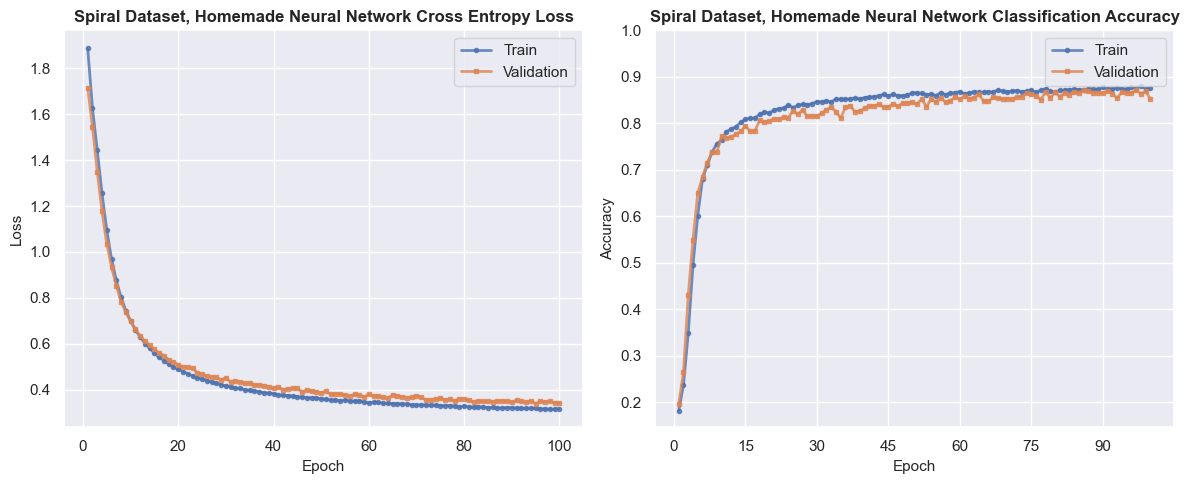

Test Loss: 0.367595, Test Accuracy: 0.862500


In [5]:
plot_training_metrics(
    train_losses=train_losses,
    train_accuracies=train_accuracies,
    val_losses=val_losses,
    val_accuracies=val_accuracies,
    title="Spiral Dataset, Homemade Neural Network"
)
test_loss, test_accuracy = test(model, X_test, y_test)

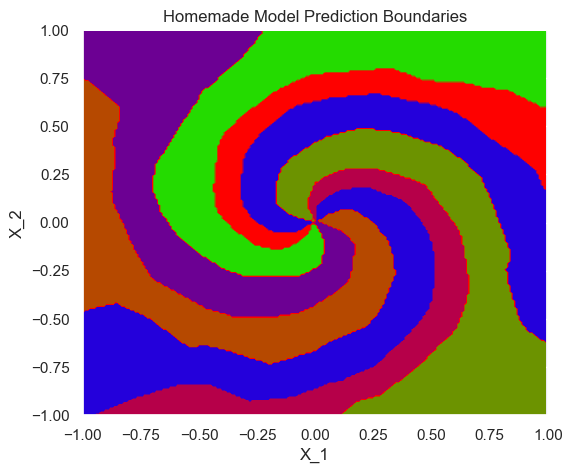

In [6]:
plot_spiral_data_decision_boundary(model, title='Homemade Model Prediction Boundaries')

### 3. Build, Train, and Test PyTorch Model for Comparison

In [7]:
import torch.nn.functional as F
import torch.nn as nn 
import torch.optim as optim 
from pytorch_utils import pytorch_generate_dataloader, pytorch_train_val, pytorch_test, pytorch_plot_spiral_data_decision_boundary

In [8]:
dataloader_train = pytorch_generate_dataloader(X_train, y_train, batch_size)
dataloader_val = pytorch_generate_dataloader(X_val, y_val, batch_size)
dataloader_test = pytorch_generate_dataloader(X_test, y_test, batch_size)


In [9]:
class Net(nn.Module):
  def __init__(self, input_size, num_classes):
    super().__init__()
    self.fc1 = nn.Linear(input_size, 32)
    self.fc2 = nn.Linear(32, 16)
    self.fc3 = nn.Linear(16, num_classes)
    
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
    

In [10]:
model = Net(D, K)
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss() 

train_losses, train_accuracies, val_losses, val_accuracies = pytorch_train_val(
  model,
  dataloader_train,
  dataloader_val,
  criterion,
  optimizer,
  epochs=EPOCHS,
  verbose_freq = 10
)

Epoch 10, Train Loss: 1.041250, Train Accuracy: 0.610714, Val Loss: 1.012726, Val Accuracy: 0.603333
Epoch 20, Train Loss: 0.649621, Train Accuracy: 0.766964, Val Loss: 0.650661, Val Accuracy: 0.753333
Epoch 30, Train Loss: 0.515209, Train Accuracy: 0.808750, Val Loss: 0.529816, Val Accuracy: 0.800000
Epoch 40, Train Loss: 0.448651, Train Accuracy: 0.831429, Val Loss: 0.467169, Val Accuracy: 0.818333
Epoch 50, Train Loss: 0.410652, Train Accuracy: 0.836964, Val Loss: 0.431566, Val Accuracy: 0.825000
Epoch 60, Train Loss: 0.388559, Train Accuracy: 0.844821, Val Loss: 0.409023, Val Accuracy: 0.833333
Epoch 70, Train Loss: 0.371058, Train Accuracy: 0.851964, Val Loss: 0.391900, Val Accuracy: 0.836667
Epoch 80, Train Loss: 0.355362, Train Accuracy: 0.859643, Val Loss: 0.385124, Val Accuracy: 0.847500
Epoch 90, Train Loss: 0.344294, Train Accuracy: 0.863393, Val Loss: 0.373212, Val Accuracy: 0.845000
Epoch 100, Train Loss: 0.337766, Train Accuracy: 0.868036, Val Loss: 0.363940, Val Accuracy

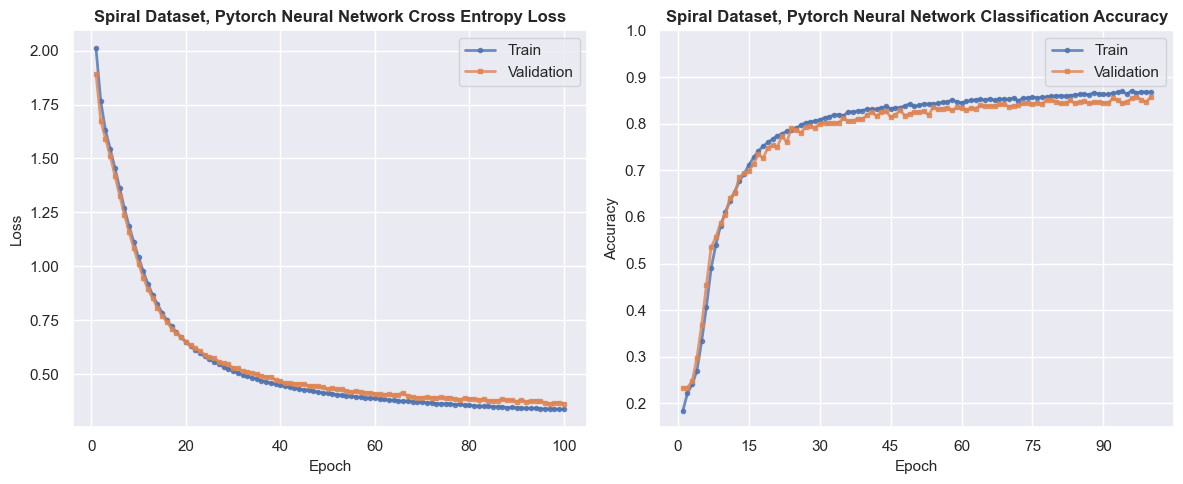

Test Loss: 0.386186, Test Accuracy: 0.850000


In [11]:
plot_training_metrics(
    train_losses=train_losses,
    train_accuracies=train_accuracies,
    val_losses=val_losses,
    val_accuracies=val_accuracies,
    title="Spiral Dataset, Pytorch Neural Network"
)

test_loss, test_accuracy = pytorch_test(model, dataloader_test, criterion)

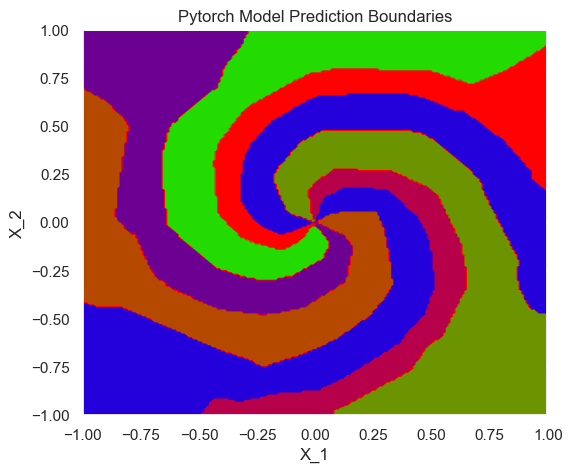

In [12]:
pytorch_plot_spiral_data_decision_boundary(model, title='Pytorch Model Prediction Boundaries')